In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib import font_manager

In [2]:
df = pd.read_csv('A_stat_data_112.csv')
df2 = df.copy()

In [3]:
df2.head()

grade                      mission_name mission_difficulty mission_field  \
0      5        05/06 ËôéÂßëÂ©Ü„ÄêÂ§öÂÖÉÊñáÂåñÊïôËÇ≤ÔºçÂÇ≥Ë™™ÊïÖ‰∫ã„ÄëÔºàÂàùÈöéÔºâ                  Êòì            ÊñáÂ≠∏   
1      5         05/06 ‰∫åÈÉé„ÄêÂ§öÂÖÉÊñáÂåñÊïôËÇ≤ÔºçÂÇ≥Ë™™ÊïÖ‰∫ã„ÄëÔºàÂàùÈöéÔºâ                  ‰∏≠            ÊñáÂ≠∏   
2      6         05/09 Ëö©Â∞§„ÄêÂ§öÂÖÉÊñáÂåñÊïôËÇ≤ÔºçÂÇ≥Ë™™ÊïÖ‰∫ã„ÄëÔºàÂàùÈöéÔºâ                  Èõ£            ‰∫∫Áâ©   
3      5        05/13 ÁãóÁãóÂêÉ‰æø‰æø„ÄêÁí∞Â¢ÉÊïôËÇ≤ÔºçÂãïÁâ©Â•áËÅû„ÄëÔºàÂàùÈöéÔºâ                  ‰∏≠          ÁîüÊ¥ªÁü•Ë≠ò   
4      6  05/16 ÁôΩËüªË∑ü‰Ω†ÊÉ≥ÂÉèÁöÑ‰∏ç‰∏ÄÊ®£ÔºÅ„ÄêÁí∞Â¢ÉÊïôËÇ≤ÔºçÂãïÁâ©Â•áËÅû„ÄëÔºàÂàùÈöéÔºâ                  Êòì          Ëá™ÁÑ∂ÁßëÂ≠∏   

  mission_type  mission_semester_year mission_semester  \
0           ÈÄ£Á∫å                    112            112-2   
1           ÈÄ£Á∫å                    112            112-2   
2           ÈÄ£Á∫å                    112            112-2   
3          ÈùûÈÄ£Á∫å                    112            112-2   
4        ÈÄ£Á∫åÔºãÂúñË°®                    112            112-2   

          mission_datetime_utc8 mission_status  is_completed  ...  \
0  Mon May 06 08:00:00 UTC 2024          Â∑≤Ê¥æÁôº‰ªªÂãô             0  ...   
1  Mon May 06 08:00:00 UTC 2024          Â∑≤Ê¥æÁôº‰ªªÂãô             0  ...   
2  Thu May 09 08:00:00 UTC 2024          Â∑≤Ê¥æÁôº‰ªªÂãô             0  ...   
3  Mon May 13 08:00:00 UTC 2024          Â∑≤Ê¥æÁôº‰ªªÂãô             0  ...   
4  Thu May 16 08:00:00 UTC 2024          Â∑≤Ê¥æÁôº‰ªªÂãô             0  ...   

  answer_duration_sec  mission_answer_count  content_indicator_correct_rate  \
0                 NaN                     0                             NaN   
1                 NaN                     0                             NaN   
2                 NaN                     0                             NaN   
3                 NaN                     0                             NaN   
4                 NaN                     0                             NaN   

   comprehensive_indicator_correct_rate  explanation_indicator_correct_rate  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   extraction_indicator_correct_rate  form_indicator_correct_rate  \
0                                NaN                          NaN   
1                                NaN                          NaN   
2                                NaN                          NaN   
3                                NaN                          NaN   
4                                NaN                          NaN   

   first_correct_rate              user_id           mission_id  
0                 NaN -8373966078912715601  8154604467375388289  
1                 NaN  3516683932418412104  3762301478342295221  
2                 NaN   -65799051578279613  4652807748946159405  
3                 NaN -6293485111595748020   240621445882253268  
4                 NaN  4998280410504838977 -3340858198738005072  

[5 rows x 22 columns]

In [4]:
df_DiffAndPass = df2[['first_correct_rate', 'mission_difficulty']].dropna()
df_DiffAndPass.head()
df_DiffAndPass.to_csv("DiffAndPass.csv", index=False)

In [5]:
df_DiffAndPass.head()

first_correct_rate mission_difficulty
10                 0.0                  Êòì
11                 0.4                  ‰∏≠
40                 0.2                  Èõ£
64                 0.2                  Èõ£
65                 0.4                  Èõ£

In [ ]:
# ÂÆöÁæ©‰∏ÄÂÄãÂáΩÊï∏‰æÜËΩâÊèõÈõ£Â∫¶Á≠âÁ¥ö
def translate_difficulty(difficulty):
    if difficulty == "Êòì":
        return "Easy"
    elif difficulty == "‰∏≠":
        return "Medium"
    elif difficulty == "Èõ£":
        return "Hard"
    else:
        return difficulty  # Â¶ÇÊûúÈÅáÂà∞Êú™Áü•ÁöÑÂÄºÔºå‰øùÊåÅÂéüÊ®£

# ‰ΩøÁî® apply ÂáΩÊï∏ÊáâÁî®Âà∞ mission_difficulty Ê¨Ñ‰Ωç
df_DiffAndPass["mission_difficulty"] = df_DiffAndPass["mission_difficulty"].apply(translate_difficulty)

# Êü•ÁúãÁµêÊûú
df_DiffAndPass.head()


first_correct_rate mission_difficulty
10                 0.0               Easy
11                 0.4             Medium
40                 0.2               Hard
64                 0.2               Hard
65                 0.4               Hard

## Âõ∞Èõ£È°åÂúñÂΩ¢

In [13]:
df_hard = df_DiffAndPass[df_DiffAndPass["mission_difficulty"].str.contains("Hard", na=False)]
df_hard.tail()
LensOfHard = len(df_hard)

In [14]:
import plotly.express as px
import plotly.graph_objects as go

# Ë®àÁÆó first_correct_rate ÊØèÂÄãÂÄºÁöÑÂá∫ÁèæÊ¨°Êï∏
rate_counts = df_hard['first_correct_rate'].value_counts().reset_index()
rate_counts.columns = ['first_correct_rate', 'count']

# Êåâ first_correct_rate Êï∏ÂÄºÊéíÂ∫è
rate_counts = rate_counts.sort_values(by='first_correct_rate')

# Ë®àÁÆó first_correct_rate ÁöÑÂπ≥ÂùáÂÄº
mean_rate = df_hard['first_correct_rate'].mean()
mean_rate_hard = mean_rate
# Áπ™Ë£ΩÈï∑Ê¢ùÂúñ
fig = px.bar(rate_counts, x='first_correct_rate', y='count', 
             title="First Correct Rate (Hard)", 
             labels={'first_correct_rate': 'First Correct Rate', 'count': 'Âá∫ÁèæÊ¨°Êï∏'})

# Âä†ÂÖ•Âπ≥ÂùáÁ∑ö
fig.add_trace(go.Scatter(x=[mean_rate, mean_rate], y=[0, rate_counts['count'].max()],
                         mode="lines",
                         name="Âπ≥ÂùáÁ∑ö",
                         line=dict(color="red", dash="dash")))

# Êõ¥Êñ∞ÂúñË°®ÁöÑÊ®ôÁ±§
fig.update_layout(yaxis_title="Âá∫ÁèæÊ¨°Êï∏", xaxis_title="First Correct Rate")
fig.show()


## ‰∏≠Á≠âÈ°åÂúñÂΩ¢

In [15]:
df_mid = df_DiffAndPass[df_DiffAndPass["mission_difficulty"].str.contains("Medium", na=False)]
df_mid.tail()
LensOfMid = len(df_mid)

In [16]:
import plotly.express as px
import plotly.graph_objects as go

# Ë®àÁÆó first_correct_rate ÊØèÂÄãÂÄºÁöÑÂá∫ÁèæÊ¨°Êï∏
rate_counts = df_mid['first_correct_rate'].value_counts().reset_index()
rate_counts.columns = ['first_correct_rate', 'count']

# Êåâ first_correct_rate Êï∏ÂÄºÊéíÂ∫è
rate_counts = rate_counts.sort_values(by='first_correct_rate')

# Ë®àÁÆó first_correct_rate ÁöÑÂπ≥ÂùáÂÄº
mean_rate = df_mid['first_correct_rate'].mean()
mean_rate_mid = mean_rate
# Áπ™Ë£ΩÈï∑Ê¢ùÂúñ
fig = px.bar(rate_counts, x='first_correct_rate', y='count', 
             title="First Correct Rate (Medium)", 
             labels={'first_correct_rate': 'First Correct Rate', 'count': 'Âá∫ÁèæÊ¨°Êï∏'})

# Âä†ÂÖ•Âπ≥ÂùáÁ∑ö
fig.add_trace(go.Scatter(x=[mean_rate, mean_rate], y=[0, rate_counts['count'].max()],
                         mode="lines",
                         name="Âπ≥ÂùáÁ∑ö",
                         line=dict(color="red", dash="dash")))

# Êõ¥Êñ∞ÂúñË°®ÁöÑÊ®ôÁ±§
fig.update_layout(yaxis_title="Âá∫ÁèæÊ¨°Êï∏", xaxis_title="First Correct Rate")
fig.show()


## Á∞°ÊòìÈ°åÂúñÂΩ¢

In [17]:
df_easy = df_DiffAndPass[df_DiffAndPass["mission_difficulty"].str.contains("Easy", na=False)]
df_easy.tail()
LensOfEasy = len(df_easy)

In [18]:
import plotly.express as px
import plotly.graph_objects as go

# Ë®àÁÆó first_correct_rate ÊØèÂÄãÂÄºÁöÑÂá∫ÁèæÊ¨°Êï∏
rate_counts = df_easy['first_correct_rate'].value_counts().reset_index()
rate_counts.columns = ['first_correct_rate', 'count']

# Êåâ first_correct_rate Êï∏ÂÄºÊéíÂ∫è
rate_counts = rate_counts.sort_values(by='first_correct_rate')

# Ë®àÁÆó first_correct_rate ÁöÑÂπ≥ÂùáÂÄº
mean_rate = df_easy['first_correct_rate'].mean()
mean_rate_ez = mean_rate
# Áπ™Ë£ΩÈï∑Ê¢ùÂúñ
fig = px.bar(rate_counts, x='first_correct_rate', y='count', 
             title="First Correct Rate (Easy)", 
             labels={'first_correct_rate': 'First Correct Rate', 'count': 'Âá∫ÁèæÊ¨°Êï∏'})

# Âä†ÂÖ•Âπ≥ÂùáÁ∑ö
fig.add_trace(go.Scatter(x=[mean_rate, mean_rate], y=[0, rate_counts['count'].max()],
                         mode="lines",
                         name="Âπ≥ÂùáÁ∑ö",
                         line=dict(color="red", dash="dash")))

# Êõ¥Êñ∞ÂúñË°®ÁöÑÊ®ôÁ±§
fig.update_layout(yaxis_title="Âá∫ÁèæÊ¨°Êï∏", xaxis_title="First Correct Rate")
fig.show()


In [19]:
print(mean_rate_ez)
print(mean_rate_mid)
print(mean_rate_hard)
#print(LensOfEasy,LensOfMid,LensOfHard)

0.47508006578377904
0.4534720475411898
0.43858718797653556


# ANOVAÂàÜÊûê

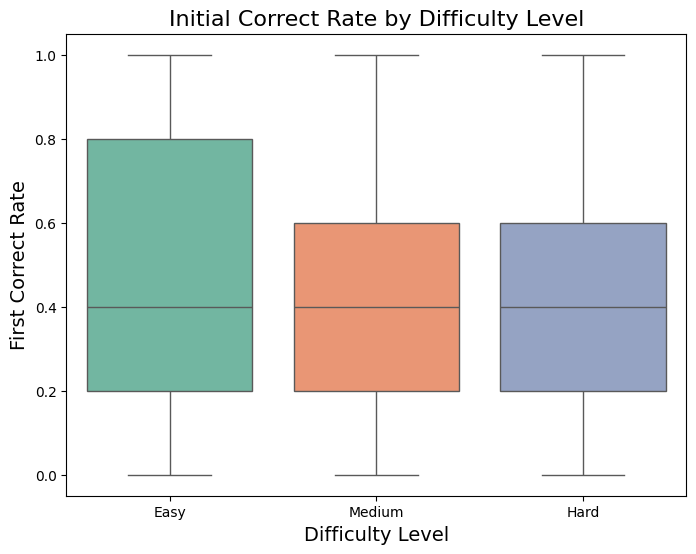

ANOVA p-value: 1.2003713636168536e-148


In [25]:
# Ë≥áÊñô
data = df_DiffAndPass

# ÂàÜÁµÑË≥áÊñô
groups = data.groupby('mission_difficulty')['first_correct_rate'].apply(list)

# ANOVA ÂàÜÊûê
anova_result = stats.f_oneway(*groups)
anova_result_pvalue = anova_result.pvalue

# Áπ™Ë£ΩÁÆ±Á∑öÂúñ
plt.figure(figsize=(8, 6))
sns.boxplot(x='mission_difficulty', y='first_correct_rate', data=data, hue='mission_difficulty', palette='Set2', legend=False)
plt.title('Initial Correct Rate by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=14)
plt.ylabel('First Correct Rate', fontsize=14)
plt.show()

# Âç∞Âá∫ p-value ÁµêÊûú
print(f"ANOVA p-value: {anova_result_pvalue}")

# ‰∏≠Á≠âËàáÁ∞°ÂñÆÈ°åÁõÆ‰πãANOVA

In [38]:
df_EasyAndMid = df_DiffAndPass[
    (df_DiffAndPass["mission_difficulty"] == "Medium") |
    (df_DiffAndPass["mission_difficulty"] == "Easy")
]

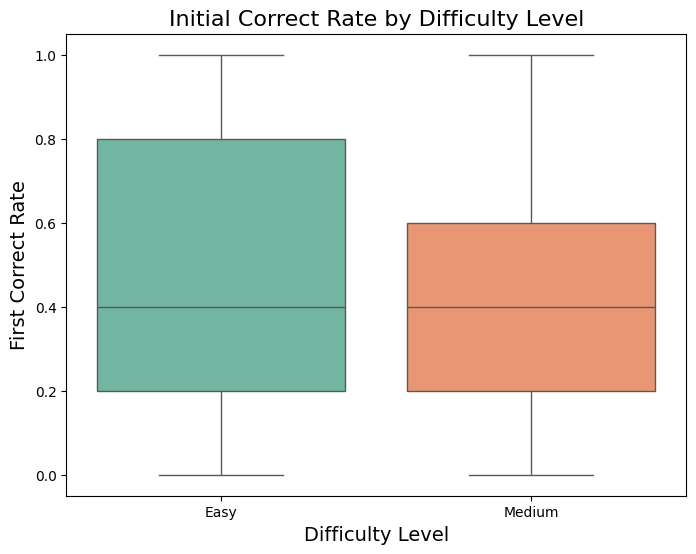

ANOVA p-value: 3.2033224681677758e-86


In [42]:
# Ë≥áÊñô
data = df_EasyAndMid
# ÂàÜÁµÑË≥áÊñô
groups = data.groupby('mission_difficulty')['first_correct_rate'].apply(list)

# ANOVA ÂàÜÊûê
anova_result = stats.f_oneway(*groups)
anova_result_pvalue = anova_result.pvalue

# Áπ™Ë£ΩÁÆ±Á∑öÂúñ
plt.figure(figsize=(8, 6))
sns.boxplot(x='mission_difficulty', y='first_correct_rate', data=data, hue='mission_difficulty', palette='Set2', legend=False)
plt.title('Initial Correct Rate by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=14)
plt.ylabel('First Correct Rate', fontsize=14)
plt.show()

# Âç∞Âá∫ p-value ÁµêÊûú
print(f"ANOVA p-value: {anova_result_pvalue}")

# ‰∏≠Á≠âËàáÂõ∞Èõ£È°åÁõÆ‰πãANOVA

In [ ]:
df_MidAndHard = df_DiffAndPass[
    (df_DiffAndPass["mission_difficulty"] == "Medium") |
    (df_DiffAndPass["mission_difficulty"] == "Hard")
]

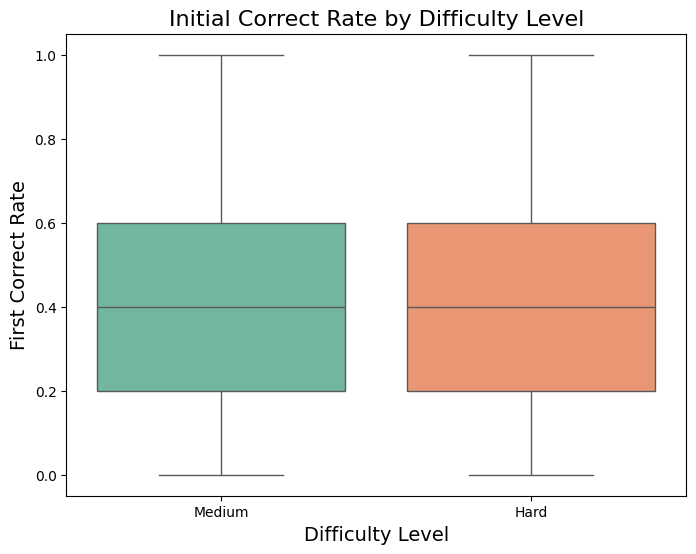

ANOVA p-value: 8.284437395450216e-29


In [29]:
# Ë≥áÊñô
data = df_MidAndHard

# ÂàÜÁµÑË≥áÊñô
groups = data.groupby('mission_difficulty')['first_correct_rate'].apply(list)

# ANOVA ÂàÜÊûê
anova_result = stats.f_oneway(*groups)
anova_result_pvalue = anova_result.pvalue

# Áπ™Ë£ΩÁÆ±Á∑öÂúñ
plt.figure(figsize=(8, 6))
sns.boxplot(x='mission_difficulty', y='first_correct_rate', data=data, hue='mission_difficulty', palette='Set2', legend=False)
plt.title('Initial Correct Rate by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=14)
plt.ylabel('First Correct Rate', fontsize=14)
plt.show()

# Âç∞Âá∫ p-value ÁµêÊûú
print(f"ANOVA p-value: {anova_result_pvalue}")

# Á∞°ÂñÆËàáÂõ∞Èõ£È°åÁõÆ‰πãANOVAÂàÜÊûê

In [43]:
df_EasyAndHard = df_DiffAndPass[
    (df_DiffAndPass["mission_difficulty"] == "Easy") |
    (df_DiffAndPass["mission_difficulty"] == "Hard")
]

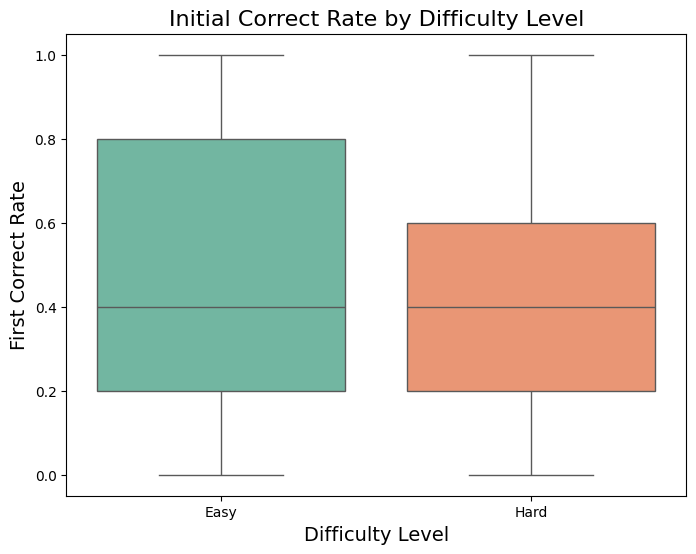

ANOVA p-value: 6.359809504261657e-133


In [45]:
# Ë≥áÊñô
data = df_EasyAndHard

# ÂàÜÁµÑË≥áÊñô
groups = data.groupby('mission_difficulty')['first_correct_rate'].apply(list)

# ANOVA ÂàÜÊûê
anova_result = stats.f_oneway(*groups)
anova_result_pvalue = anova_result.pvalue

# Áπ™Ë£ΩÁÆ±Á∑öÂúñ
plt.figure(figsize=(8, 6))
sns.boxplot(x='mission_difficulty', y='first_correct_rate', data=data, hue='mission_difficulty', palette='Set2', legend=False)
plt.title('Initial Correct Rate by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=14)
plt.ylabel('First Correct Rate', fontsize=14)
plt.show()

# Âç∞Âá∫ p-value ÁµêÊûú
print(f"ANOVA p-value: {anova_result_pvalue}")

# Ëß£Èáã
### YËª∏ÁÇ∫Á≠îÂ∞çÁéáÔºå‰ªãÊñº0(ÂÖ®ÈåØ)Âà∞1(ÂÖ®Â∞ç)‰πãÈñìÔºåXËª∏ÁÇ∫Èõ£Â∫¶ÂàÜÁµÑÔºåÁÆ±ÂΩ¢ÂúñÂèØ‰ª•ÁúãÂá∫ÔºåÁ∞°ÂñÆÁöÑÈ°åÁõÆÁöÑÁ≠îÂ∞çÁéá‰∏äÈôêÊòéÈ°ØÂÅèÈ´òÔºåÂñÆÁç®ÊãâÂá∫‰∏≠Á≠âÂèäÂõ∞Èõ£È°åÁõÆÂæåÔºåÂèØ‰ª•ÁúãÂá∫‰ªñÂÄëÁöÑP-Value‰ªçÂ∞èÊñº‰ø°ÂøÉÊ∞¥Ê∫ñ
#### ANOVA ‰πãP-ValueÂ∞èÊñº‰ø°ÂøÉÊ∞¥Ê∫ñÈ°ØËëóÊÄßÊ∞¥Ê∫ñ (ùõº) ÁÇ∫ 0.05ÔºåÂõ†Ê≠§ÊàëÂÄëÊãíÁµïÈõ∂ÂÅáË®≠ÔºåÊØèÂÄãÂïèÈ°åÁöÑÈõ£Â∫¶Â∑ÆË∑ù‰ª•ÂèäÁ≠îÂ∞çÁéáÁöÑÈóúËÅØÊòØÈ°ØËëóÁöÑÔºåÂç≥Ë©≤È°åÁõÆË®≠Ë®à‰πãÈõ£Â∫¶Ê≠£Á¢∫ÁÑ°Ë™§„ÄÇ